In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['figure.facecolor'] = '#00000000'

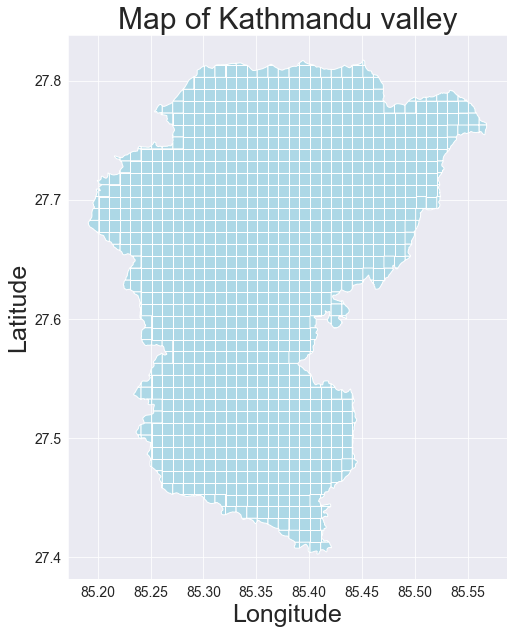

In [3]:
x = gpd.read_file('E:\Kathmandu_valley/ktm_fishnet_1x1km.shp')
x.plot(color = 'lightblue')
plt.xlabel("Longitude", fontsize = 25)
plt.ylabel("Latitude", fontsize = 25)
plt.title("Map of Kathmandu valley", fontsize = 30);

In [4]:
x

,Id,geometry
0,0,"POLYGON ((85.39088 27.60275, 85.38088 27.60275..."
1,0,"POLYGON ((85.20088 27.70275, 85.19797 27.70275..."
2,0,"POLYGON ((85.31088 27.58275, 85.30088 27.58275..."
3,0,"POLYGON ((85.37088 27.58275, 85.36088 27.58275..."
4,0,"POLYGON ((85.31088 27.76275, 85.30088 27.76275..."
...,...,...
955,0,"POLYGON ((85.34088 27.60275, 85.33088 27.60275..."
956,0,"POLYGON ((85.33088 27.49275, 85.32088 27.49275..."
957,0,"POLYGON ((85.28088 27.77275, 85.27088 27.77275..."
958,0,"POLYGON ((85.22088 27.67275, 85.21088 27.67275..."


In [5]:
Aerosol_df_9 = pd.read_csv('D:/Data/Modis_aerosol_data/Y2009/Nepal_Aerosol_2009_selected_by_arcgis.csv');Aerosol_df_9
geometry_nep = [Point(xy) for xy in zip(Aerosol_df_9['Longitude'], Aerosol_df_9['Latitude'])]
Aerosol_df_9 = GeoDataFrame(Aerosol_df_9, geometry=geometry_nep)

In [1]:
# get the aerosol daa, load it into aerosol dataframe, and create the geometry object
# get the bounding cordinates of kathmandu valley
# values = []
# for i in range(len(Aerosol_df_9)):
#     if Aerosol_df_9.geometry.iloc[i].within(x):
#         values.append(i)

# aerosol_of_ktm_valley = Aerosol_df_9.loc[values].reset_index()

In [8]:
from tqdm import tqdm

In [9]:
AOD_550 = []

for i in tqdm(range(0, len(x))):
   # selecting a district
    district_geometry = x['geometry'][i]
    AOD_for_district = 0
    
 # checking cordinates of lightning
    for j in range(0, Aerosol_df_20.shape[0]):
        if (Aerosol_df_20['geometry'][j].within(district_geometry)):
            AOD_for_district += Aerosol_df_20[j]['AOD'] # please change the AOD name with proper column name in your data
             
    AOD_550.append(AOD_for_district)

100%|██████████| 960/960 [1:03:59<00:00,  4.00s/it]


In [12]:
x['AOD_550'] = AOD_550

AttributeError: 'int' object has no attribute 'values'

KeyError: 'AOD_550'

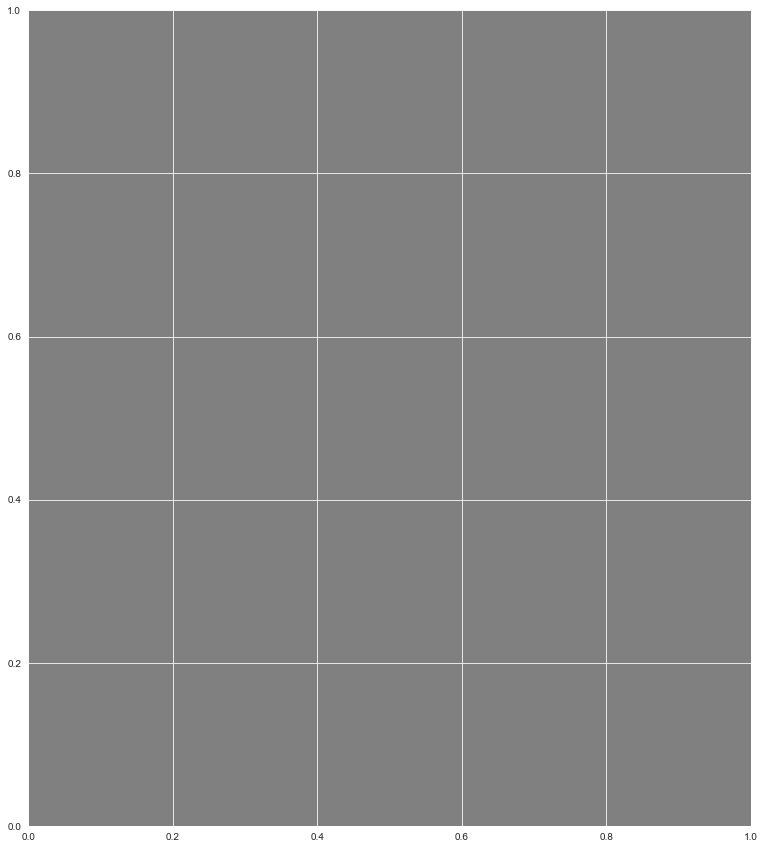

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('grey')
x.plot(column = 'AOD_550', ax=ax, cmap = 'Reds',alpha = 1,
                legend = True, legend_kwds={'shrink': 0.47,'label': "Strokes density per year"}, 
                markersize = 10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
ax.set_title('Lightning flashes in 2015 of Kathmandu valley');
#fig.figure.savefig('TEST/flash1.jpg', format = 'jpg', dpi = 1000)
#fig.figure.savefig('PLOTS/lightning_flashes_based_on_districts.jpg', format = 'jpg')#, dpi = 1000)

In [ ]:
# get the aerosol daa, load it into aerosol dataframe, and create the geometry object
# get the bounding cordinates of kathmandu valley
values = []
for i in len(Aerosol_df_20):
    if Aerosol_df_20.geometry.iloc[i].within(x):
        values.append(i)

aerosol_of_ktm_valley = Aerosol_df_20.loc[values]